<a href="https://colab.research.google.com/github/vasuans/Tensorflow-Projects/blob/master/CNN_for_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tensorflow**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


**Importing other required libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

Imporing CIFAR dataset from Tensorflow datasteps

In [3]:
data = tf.keras.datasets.cifar10

In [4]:
(x_train,y_train),(x_test,y_test) = data.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape)

(50000, 32, 32, 3)


**Input data is already in required shape .i.e. N X W X H X K** 

**Normalizing Data**

In [25]:
x_train,x_test = x_train/255.0,x_test/255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
print(y_train)

[6 9 9 ... 9 1 1]


In [22]:
K = len(set(y_train))
print(K)

10


In [31]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation = 'relu')(i)
x = Conv2D(64,(3,3),strides=2,activation = 'relu')(x)
x = Conv2D(128,(3,3),strides=2,activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [32]:
model = Model(i,x)

In [33]:
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'] )
r = model.fit(x_train,y_train,validation_data= (x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
1563/1563 [==============================] - 48s 30ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/15
1563/1563 [==============================] - 48s 30ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 -

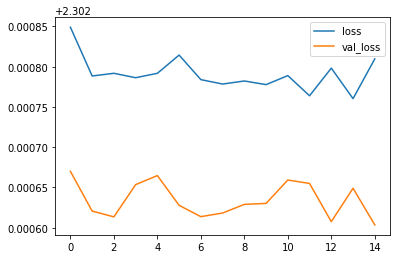

In [34]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

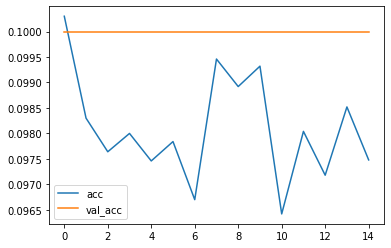

In [35]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()